# Анализ ДатаСета Звонки

In [9]:
import pandas as pd

# Замените 'your_file.xlsx' на путь к вашему файлу Excel
file_path = 'DataSet.xlsx'

# Используйте функцию read_excel для чтения данных из Excel файла
df = pd.read_excel(file_path)

# Выведите первые несколько строк данных, чтобы убедиться, что импорт выполнен успешно
df.head()


,Дата,Месяц,Неделя,День недели,Результат звонка,Юнит,Ожидание,Соединение с оператором,Длительность,Удержание,Количество удержаний,Оценки,Трансфер на
0,2023-06-01 20:07:39,Июнь,22,Четверг,Завершен клиентом,Плюс,5.0,4,311.0,58,1,0,NaN
1,2023-06-01 20:22:17,Июнь,22,Четверг,Завершен оператором,Плюс,6.0,4,624.0,137,1,5,NaN
2,2023-06-01 20:33:57,Июнь,22,Четверг,Завершен оператором,Плюс,6.0,5,66.0,0,0,5,NaN
3,2023-06-01 20:43:51,Июнь,22,Четверг,Завершен оператором,Плюс,3.0,2,676.0,306,2,0,NaN
4,2023-06-01 20:56:00,Июнь,22,Четверг,Неудачная попытка дозвона,Плюс,NaN,0,NaN,0,0,0,NaN


In [10]:
# Получите количество строк и столбцов
num_rows, num_columns = df.shape

# Выведите результат
print(f"Количество строк: {num_rows}")
print(f"Количество столбцов: {num_columns}")

Количество строк: 4050
Количество столбцов: 13


In [11]:
for column in df.columns:
    value_counts = df[column].value_counts()
    
    # Выведите результат
    print(f"Столбец: {column}")
    print(value_counts)
    print("\n")

Столбец: Дата
Дата
2023-10-12 22:30:26    5
2023-11-06 01:23:42    5
2023-11-23 00:30:44    5
2023-11-10 22:47:39    4
2023-11-12 05:27:05    4
                      ..
2023-08-06 03:27:01    1
2023-08-06 03:45:41    1
2023-08-06 04:12:03    1
2023-08-06 04:41:41    1
2023-11-25 06:47:08    1
Name: count, Length: 3915, dtype: int64


Столбец: Месяц
Месяц
Октябрь     821
Ноябрь      808
Июль        674
Сентябрь    617
Август      590
Июнь        540
Name: count, dtype: int64


Столбец: Неделя
Неделя
44    261
46    245
45    219
47    217
41    207
40    191
38    172
29    168
28    162
43    159
26    157
27    155
34    154
35    149
39    146
32    135
30    132
33    131
42    130
25    127
31    124
36    120
23    117
37    110
24    100
22     62
Name: count, dtype: int64


Столбец: День недели
День недели
Пятница        652
Суббота        635
Четверг        626
Воскресенье    608
Понедельник    517
Среда          514
Вторник        498
Name: count, dtype: int64


Столбец: Резул

In [25]:
# Преобразуйте столбец "Дата" в формат даты и времени
df['Дата'] = pd.to_datetime(df['Дата'])

# Создайте новый DataFrame с количеством звонков по каждому дню
calls_per_day = df.groupby(df['Дата'].dt.date)['Результат звонка'].count().reset_index()

# Переименуйте столбцы для ясности
calls_per_day.columns = ['Дата', 'Количество звонков']

# Выведите результат
print(calls_per_day)

           Дата  Количество звонков
0    2023-06-01                  17
1    2023-06-02                  20
2    2023-06-03                  25
3    2023-06-04                  20
4    2023-06-05                   7
..          ...                 ...
145  2023-11-21                  11
146  2023-11-22                  41
147  2023-11-23                  53
148  2023-11-24                  48
149  2023-11-25                  28

[150 rows x 2 columns]


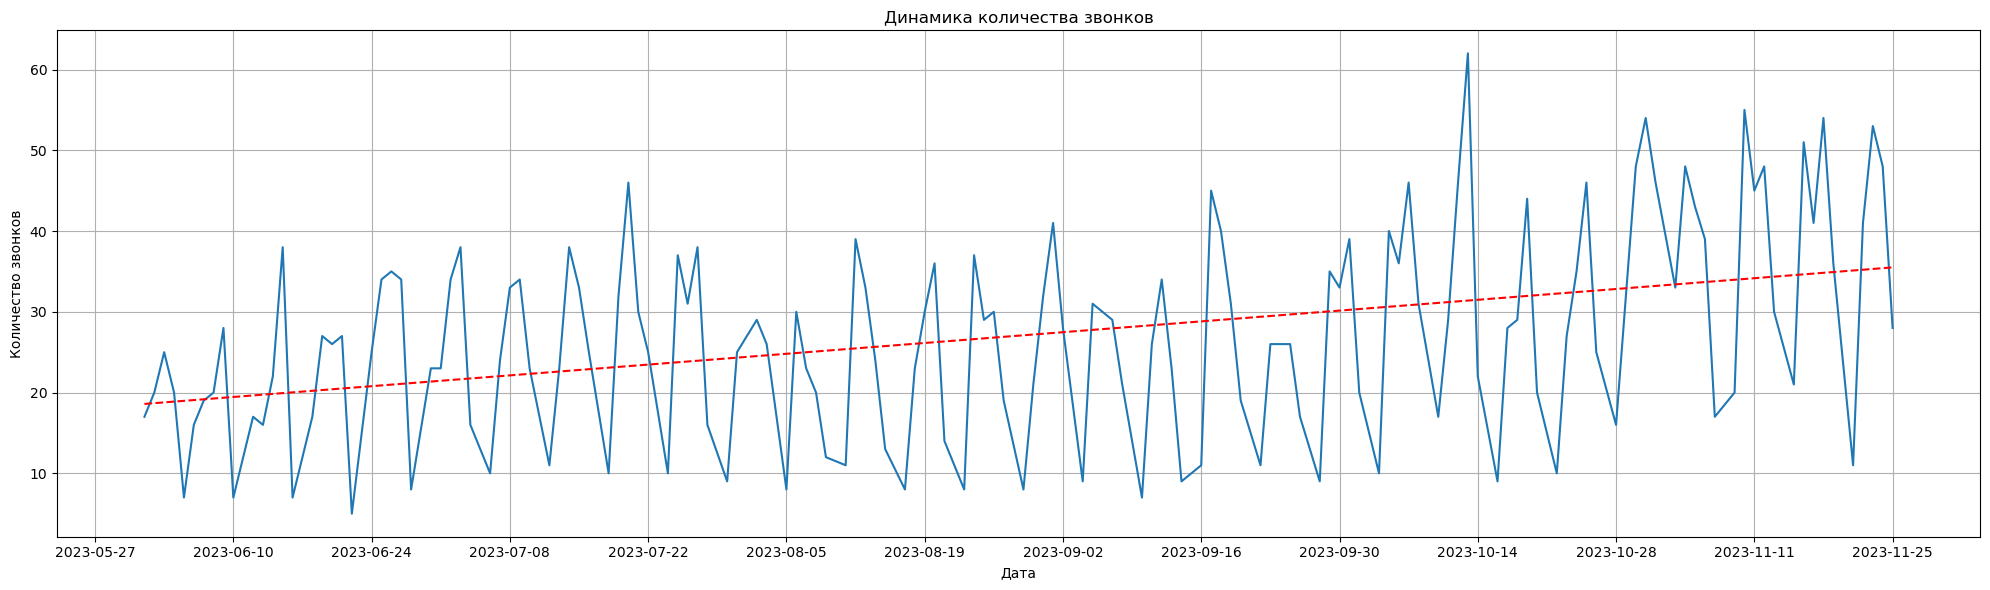

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Постройте график
plt.figure(figsize=(20, 6))
plt.plot(calls_per_day['Дата'], calls_per_day['Количество звонков'], marker=None, linestyle='-')

# Добавьте линию тренда (полином 1-й степени)
z = np.polyfit(mdates.date2num(calls_per_day['Дата']), calls_per_day['Количество звонков'], 1)
p = np.poly1d(z)
plt.plot(calls_per_day['Дата'], p(mdates.date2num(calls_per_day['Дата'])), linestyle='--', color='red', label='Линия тренда')

# Настройка осей и легенды
plt.title('Динамика количества звонков')
plt.xlabel('Дата')
plt.ylabel('Количество звонков')
plt.grid(True)

# Настройка оси X с подписями каждые 14 дней
two_weeks = mdates.DayLocator(interval=14)
plt.gca().xaxis.set_major_locator(two_weeks)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Вывод графика
plt.tight_layout()
plt.show()

In [29]:
# Создайте новый DataFrame с количеством звонков по каждому месяцу
calls_per_month = df.groupby('Месяц')['Результат звонка'].count().reset_index()

# Преобразуйте порядок месяцев в порядок календарного года
month_order = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
calls_per_month['Месяц'] = pd.Categorical(calls_per_month['Месяц'], categories=month_order, ordered=True)
calls_per_month = calls_per_month.sort_values('Месяц')

# Переименуйте столбцы для ясности
calls_per_month.columns = ['Месяц', 'Количество звонков']

# Выведите результат
calls_per_month.head(12)

,Месяц,Количество звонков
2,Июнь,540
1,Июль,674
0,Август,590
5,Сентябрь,617
4,Октябрь,821
3,Ноябрь,808


/Users/maximmanuyko/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/maximmanuyko/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


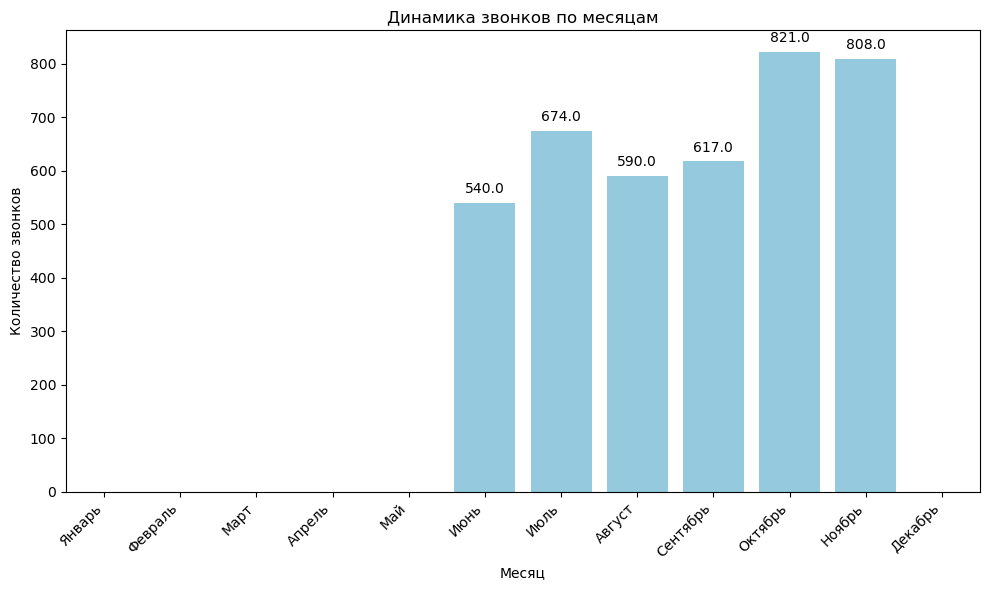

In [34]:

# Создайте новый DataFrame с количеством звонков по каждому месяцу
calls_per_month = df.groupby('Месяц')['Результат звонка'].count().reset_index()

# Преобразуйте порядок месяцев в порядок календарного года
month_order = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
calls_per_month['Месяц'] = pd.Categorical(calls_per_month['Месяц'], categories=month_order, ordered=True)
calls_per_month = calls_per_month.sort_values('Месяц')

# Постройте столбчатую диаграмму с добавлением значений
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Месяц', y='Результат звонка', data=calls_per_month, color='skyblue')
plt.title('Динамика звонков по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество звонков')

# Добавьте значения над каждым столбиком
for p in bar_plot.patches:
    bar_plot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Выведите график
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd

# Создайте новый DataFrame с количеством звонков по каждой неделе
calls_per_week = df.groupby('Неделя')['Результат звонка'].count().reset_index()

# Переименуйте столбцы для ясности
calls_per_week.columns = ['Неделя', 'Количество звонков']

# Выведите результат
calls_per_week.head(100)


,Неделя,Количество звонков
0,22,62
1,23,117
2,24,100
3,25,127
4,26,157
5,27,155
6,28,162
7,29,168
8,30,132
9,31,124


/Users/maximmanuyko/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/maximmanuyko/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/maximmanuyko/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/maximmanuyko/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

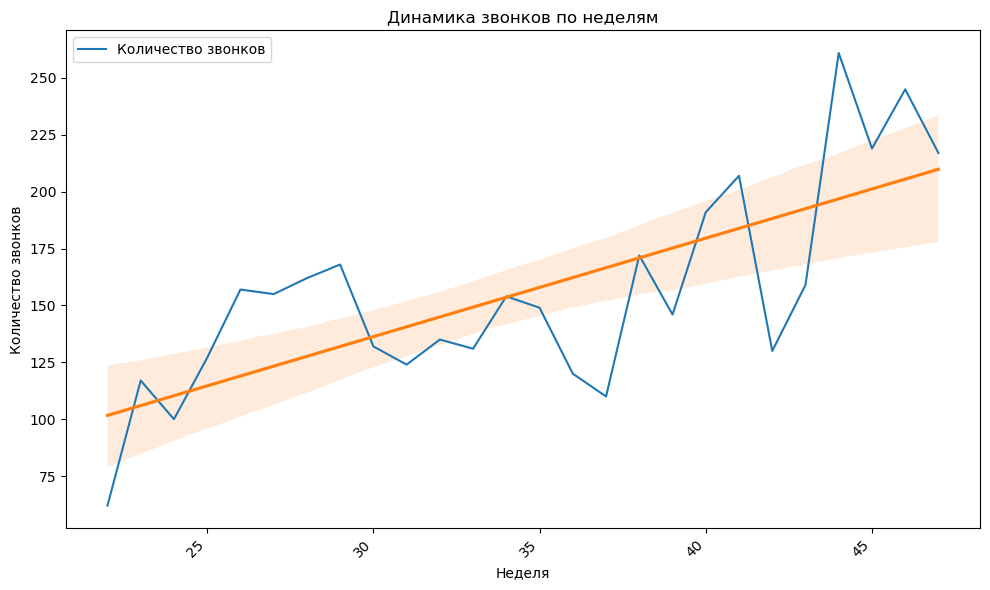

In [50]:
# Создайте новый DataFrame с количеством звонков по каждой неделе
calls_per_week = df_filtered.groupby('Неделя')['Результат звонка'].count().reset_index()

# Постройте линейный график с линией тренда
plt.figure(figsize=(10, 6))
sns.lineplot(x='Неделя', y='Результат звонка', data=calls_per_week, label='Количество звонков')

# Добавьте линию тренда
sns.regplot(x='Неделя', y='Результат звонка', data=calls_per_week, scatter=False)

# Настройте оси и легенду
plt.title('Динамика звонков по неделям')
plt.xlabel('Неделя')
plt.ylabel('Количество звонков')
plt.legend()

# Выведите график
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd

# Замените 'your_file.xlsx' на путь к вашему файлу Excel
file_path = 'DataSet.xlsx'

# Используйте функцию read_excel для чтения данных из Excel файла
df = pd.read_excel(file_path)

# Преобразуйте столбец "Дата" в формат datetime
df['Дата'] = pd.to_datetime(df['Дата'])

# Выделите месяц и создайте новый столбец "Месяц" на русском языке
month_names_russian = {
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь'
}

df['Месяц'] = df['Дата'].dt.month.map(month_names_russian)

# Преобразуйте столбец "Длительность" в формат час:мин:сек
df['Длительность'] = pd.to_timedelta(df['Длительность'], unit='s')

# Сгруппируйте данные по месяцам и найдите сумму длительности разговоров
result = df.groupby('Месяц')['Длительность'].sum()

# Конвертируйте длительность в часы
result = result.apply(lambda x: "{:0>8}".format(str(int(x.total_seconds() // 3600)) + ":" + str(int((x.total_seconds() % 3600) // 60)) + ":" + str(int(x.total_seconds() % 60))))

# Создайте DataFrame с результатами
result_df = pd.DataFrame({'Месяц': result.index, 'Длительность': result.values})

# Отсортируйте DataFrame по месяцам
result_df['Месяц'] = pd.Categorical(result_df['Месяц'], categories=month_names_russian.values(), ordered=True)
result_df = result_df.sort_values('Месяц')

# Выведите первые 12 строк
result_df.head(12)


,Месяц,Длительность
2,Июнь,74:57:31
1,Июль,79:22:30
0,Август,067:8:55
5,Сентябрь,63:57:54
4,Октябрь,75:52:15
3,Ноябрь,63:53:58


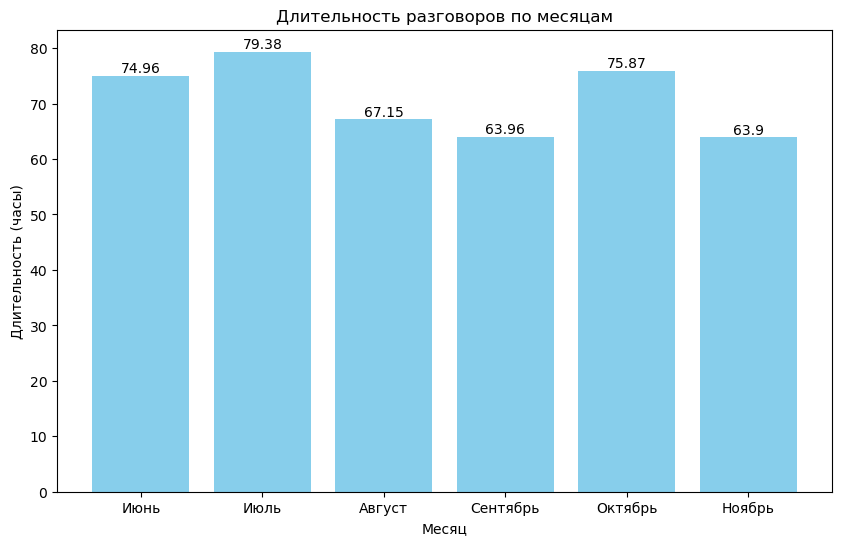

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Замените 'your_file.xlsx' на путь к вашему файлу Excel
file_path = 'DataSet.xlsx'

# Используйте функцию read_excel для чтения данных из Excel файла
df = pd.read_excel(file_path)

# Преобразуйте столбец "Дата" в формат datetime
df['Дата'] = pd.to_datetime(df['Дата'])

# Выделите месяц и создайте новый столбец "Месяц" на русском языке
month_names_russian = {
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь'
}

df['Месяц'] = df['Дата'].dt.month.map(month_names_russian)

# Преобразуйте столбец "Длительность" в формат час:мин:сек
df['Длительность'] = pd.to_timedelta(df['Длительность'], unit='s')

# Сгруппируйте данные по месяцам и найдите сумму длительности разговоров
result = df.groupby('Месяц')['Длительность'].sum()

# Конвертируйте длительность в часы
result = result.apply(lambda x: x.total_seconds() / 3600)

# Создайте DataFrame с результатами
result_df = pd.DataFrame({'Месяц': result.index, 'Длительность': result.values})

# Отсортируйте DataFrame по месяцам
result_df['Месяц'] = pd.Categorical(result_df['Месяц'], categories=month_names_russian.values(), ordered=True)
result_df = result_df.sort_values('Месяц')

# Постройте столбчатую диаграмму с подписями
plt.figure(figsize=(10, 6))
bars = plt.bar(result_df['Месяц'], result_df['Длительность'], color='skyblue')

# Добавьте значения в верхнюю часть каждого столбца
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.title('Длительность разговоров по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Длительность (часы)')
plt.show()


In [28]:
import pandas as pd

# Замените 'your_file.xlsx' на путь к вашему файлу Excel
file_path = 'DataSet.xlsx'

# Используйте функцию read_excel для чтения данных из Excel файла
df = pd.read_excel(file_path)

# Преобразуйте столбец "Дата" в формат datetime
df['Дата'] = pd.to_datetime(df['Дата'])

# Выделите месяц и создайте новый столбец "Месяц" на русском языке
month_names_russian = {
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь'
}

df['Месяц'] = df['Дата'].dt.month.map(month_names_russian)

# Преобразуйте столбец "Длительность" в формат час:мин:сек
df['Длительность'] = pd.to_timedelta(df['Длительность'], unit='s')

# Сгруппируйте данные по месяцам и найдите сумму длительности разговоров
result = df.groupby('Месяц')['Длительность'].sum()

# Конвертируйте длительность в часы
result = result.apply(lambda x: x.total_seconds() / 3600)

# Нормируйте значения
normalized_result = result / 160

# Создайте DataFrame с результатами
result_df = pd.DataFrame({'Месяц': result.index, 'Длительность': result.values})

# Отсортийте DataFrame по месяцам
result_df['Месяц'] = pd.Categorical(result_df['Месяц'], categories=month_names_russian.values(), ordered=True)
result_df = result_df.sort_values('Месяц')

# Добавьте колонку "Время отдыха"
result_df['Время отдыха'] = 160 - result_df['Длительность']

# Добавьте колонку "% отдыха"
result_df['% отдыха'] = (result_df['Время отдыха'] / 160) * 100

# Округлите значения до двух знаков после запятой
result_df['Длительность'] = result_df['Длительность'].round(2)
result_df['Время отдыха'] = result_df['Время отдыха'].round(2)
result_df['% отдыха'] = result_df['% отдыха'].round(2)

# Выведите результат
result_df.head(12)


,Месяц,Длительность,Время отдыха,% отдыха
2,Июнь,74.96,85.04,53.15
1,Июль,79.38,80.62,50.39
0,Август,67.15,92.85,58.03
5,Сентябрь,63.96,96.04,60.02
4,Октябрь,75.87,84.13,52.58
3,Ноябрь,63.90,96.10,60.06


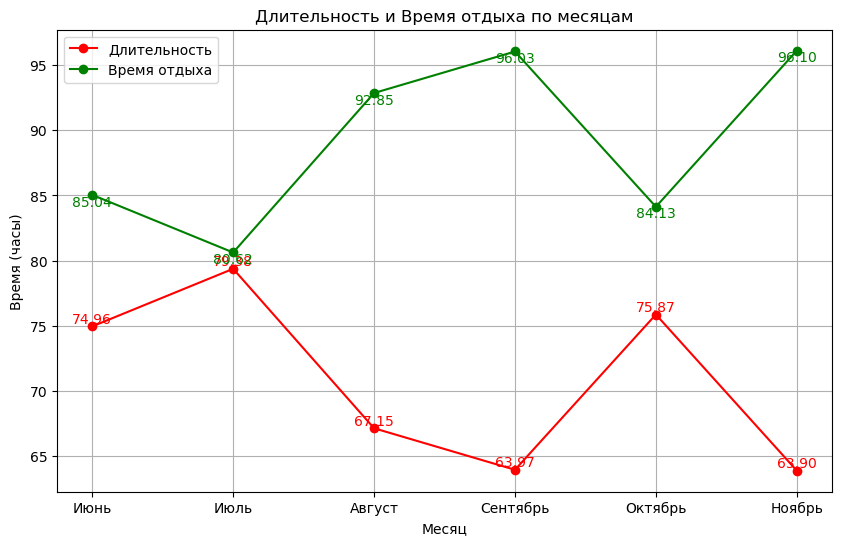

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Замените 'your_file.xlsx' на путь к вашему файлу Excel
file_path = 'DataSet.xlsx'

# Используйте функцию read_excel для чтения данных из Excel файла
df = pd.read_excel(file_path)

# Преобразуйте столбец "Дата" в формат datetime
df['Дата'] = pd.to_datetime(df['Дата'])

# Выделите месяц и создайте новый столбец "Месяц" на русском языке
month_names_russian = {
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь'
}

df['Месяц'] = df['Дата'].dt.month.map(month_names_russian)

# Преобразуйте столбец "Длительность" в формат час:мин:сек
df['Длительность'] = pd.to_timedelta(df['Длительность'], unit='s')

# Сгруппируйте данные по месяцам и найдите сумму длительности разговоров
result = df.groupby('Месяц')['Длительность'].sum()

# Конвертируйте длительность в часы
result = result.apply(lambda x: x.total_seconds() / 3600)

# Создайте DataFrame с результатами
result_df = pd.DataFrame({'Месяц': result.index, 'Длительность': result.values})

# Отсортийте DataFrame по месяцам
result_df['Месяц'] = pd.Categorical(result_df['Месяц'], categories=month_names_russian.values(), ordered=True)
result_df = result_df.sort_values('Месяц')

# Добавьте колонку "Время отдыха"
result_df['Время отдыха'] = 160 - result_df['Длительность']

# Постройте линейный график
plt.figure(figsize=(10, 6))

# График для "Длительность" (красный цвет)
plt.plot(result_df['Месяц'], result_df['Длительность'], marker='o', color='red', label='Длительность')

# График для "Время отдыха" (зелёный цвет)
plt.plot(result_df['Месяц'], result_df['Время отдыха'], marker='o', color='green', label='Время отдыха')

# Укажите значения в точках
for i, txt in enumerate(result_df['Длительность']):
    plt.annotate(f'{txt:.2f}', (result_df['Месяц'].iloc[i], result_df['Длительность'].iloc[i]), ha='center', va='bottom', color='red')

for i, txt in enumerate(result_df['Время отдыха']):
    plt.annotate(f'{txt:.2f}', (result_df['Месяц'].iloc[i], result_df['Время отдыха'].iloc[i]), ha='center', va='top', color='green')

# Настройки графика
plt.title('Длительность и Время отдыха по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Время (часы)')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
import pandas as pd

# Замените 'your_file.xlsx' на путь к вашему файлу Excel
file_path = 'DataSet.xlsx'

# Используйте функцию read_excel для чтения данных из Excel файла
df = pd.read_excel(file_path)

# Преобразуйте столбец "Дата" в формат datetime
df['Дата'] = pd.to_datetime(df['Дата'])

# Выделите месяц и создайте новый столбец "Месяц" на русском языке
month_names_russian = {
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь'
}

df['Месяц'] = df['Дата'].dt.month.map(month_names_russian)

# Преобразуйте столбец "Длительность" в формат час:мин:сек
df['Длительность'] = pd.to_timedelta(df['Длительность'], unit='s')

# Сгруппируйте данные по месяцам и найдите среднее время разговоров
result = df.groupby('Месяц')['Длительность'].mean()

# Конвертируйте среднее время в минуты:секунды
result = result.apply(lambda x: "{:0>2}:{:0>2}".format(int(x.total_seconds() // 60), int(x.total_seconds() % 60)))

# Создайте DataFrame с результатами
result_df = pd.DataFrame({'Месяц': result.index, 'Среднее время разговора': result.values})

# Отсортийте DataFrame по месяцам
result_df['Месяц'] = pd.Categorical(result_df['Месяц'], categories=month_names_russian.values(), ordered=True)
result_df = result_df.sort_values('Месяц')

# Выведите результат
result_df.head(12)


,Месяц,Среднее время разговора
2,Июнь,08:25
1,Июль,07:13
0,Август,06:56
5,Сентябрь,06:38
4,Октябрь,06:34
3,Ноябрь,06:18


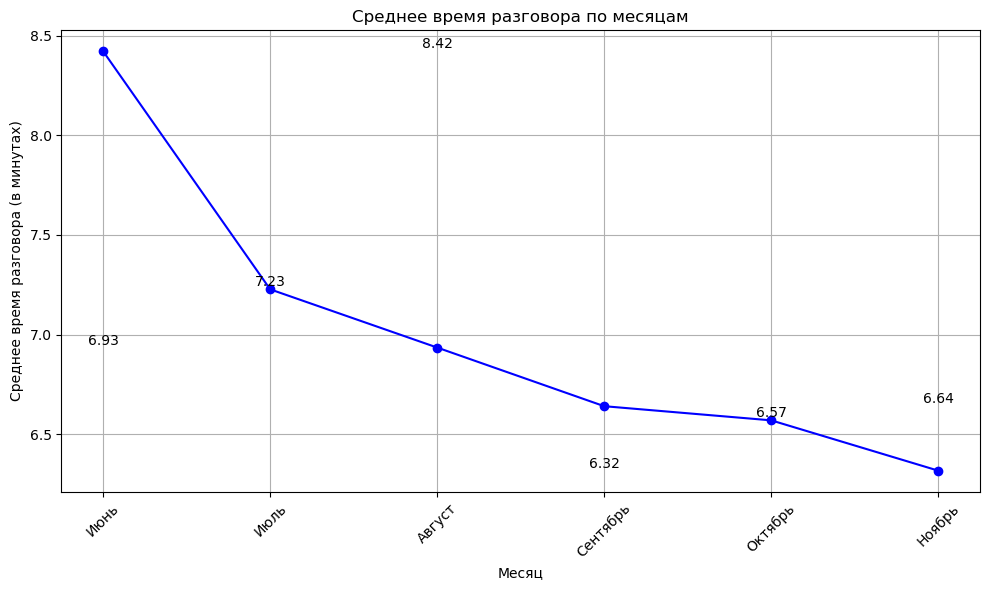

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Замените 'your_file.xlsx' на путь к вашему файлу Excel
file_path = 'DataSet.xlsx'

# Используйте функцию read_excel для чтения данных из Excel файла
df = pd.read_excel(file_path)

# Преобразуйте столбец "Дата" в формат datetime
df['Дата'] = pd.to_datetime(df['Дата'])

# Выделите месяц и создайте новый столбец "Месяц" на русском языке
month_names_russian = {
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь'
}

df['Месяц'] = df['Дата'].dt.month.map(month_names_russian)

# Преобразуйте столбец "Длительность" в формат час:мин:сек
df['Длительность'] = pd.to_timedelta(df['Длительность'], unit='s')

# Сгруппируйте данные по месяцам и найдите среднее время разговоров
result = df.groupby('Месяц')['Длительность'].mean()

# Конвертируйте среднее время в минуты:секунды
result = result.apply(lambda x: x.total_seconds() / 60)

# Создайте DataFrame с результатами
result_df = pd.DataFrame({'Месяц': result.index, 'Среднее время разговора': result.values})

# Отсортийте DataFrame по месяцам
result_df['Месяц'] = pd.Categorical(result_df['Месяц'], categories=month_names_russian.values(), ordered=True)
result_df = result_df.sort_values('Месяц')

# Постройте линейную диаграмму с добавленными значениями
plt.figure(figsize=(10, 6))
plt.plot(result_df['Месяц'], result_df['Среднее время разговора'], marker='o', color='blue')

# Добавьте значения на график
for i, txt in enumerate(result_df['Среднее время разговора']):
    plt.text(result_df['Месяц'][i], txt, f'{txt:.2f}', ha='center', va='bottom')

plt.title('Среднее время разговора по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Среднее время разговора (в минутах)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

# Замените 'DataSet.xlsx' на путь к вашему файлу Excel
file_path = 'DataSet.xlsx'

# Используйте функцию read_excel для чтения данных из Excel файла
df = pd.read_excel(file_path)

# Извлекаем час из столбца "Дата"
df['Время'] = pd.to_datetime(df['Дата']).dt.hour

# Группируем данные по часам и подсчитываем количество звонков
result = df.groupby('Время').size().reset_index(name='Количество звонков')

# Выводим результат
result.head(15)


,Время,Количество звонков
0,0,508
1,1,327
2,2,149
3,3,298
4,4,300
5,5,424
6,6,144
7,7,8
8,16,8
9,17,9


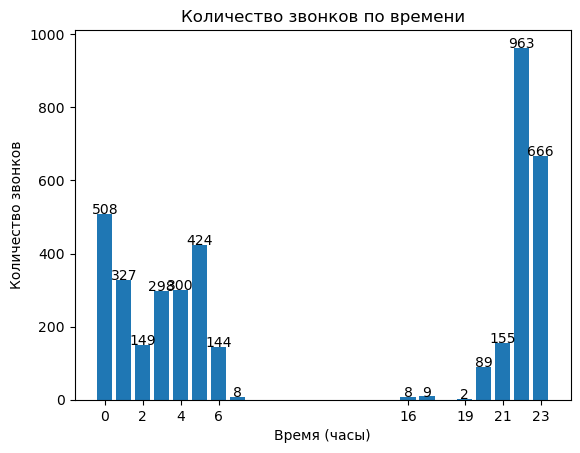

In [6]:
# Строим столбчатую диаграмму
plt.bar(result['Время'], result['Количество звонков'])

# Добавляем подписи осей и заголовок
plt.xlabel('Время (часы)')
plt.ylabel('Количество звонков')
plt.title('Количество звонков по времени')

# Пронумеруем ось X через одно значение
plt.xticks(result['Время'][::2])

# Добавляем значения сверху столбиков
for i, value in enumerate(result['Количество звонков']):
    plt.text(result['Время'][i], value + 0.1, str(value), ha='center')

# Отображаем диаграмму
plt.show()


In [23]:
import pandas as pd

# Замените 'DataSet.xlsx' на путь к вашему файлу Excel
file_path = 'DataSet.xlsx'

# Используйте функцию read_excel для чтения данных из Excel файла
df = pd.read_excel(file_path)

# Извлекаем месяц и час из столбца "Дата"
df['Месяц'] = pd.to_datetime(df['Дата']).dt.month
df['Час'] = pd.to_datetime(df['Дата']).dt.hour

# Создаем сводную таблицу
pivot_table = df.pivot_table(values='Дата', index=df['Месяц'], columns=df['Час'], aggfunc='count', fill_value=0)

# Переименовываем колонки для удобства
pivot_table.columns = [f'{hour} час' for hour in pivot_table.columns]

# Переименовываем строки (месяцы) для удобства
month_names = df['Месяц'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B')).unique()
pivot_table.index = month_names

# Выводим результат
pivot_table.head(8)


,0 час,1 час,2 час,3 час,4 час,5 час,6 час,7 час,16 час,17 час,19 час,20 час,21 час,22 час,23 час
June,35,34,39,34,1,0,0,0,0,0,2,89,103,120,83
July,86,61,32,45,73,89,0,0,8,9,0,0,10,155,106
August,81,62,28,55,54,83,0,0,0,0,0,0,10,120,97
September,94,45,20,41,53,87,4,0,0,0,0,0,12,150,111
October,97,61,27,58,64,87,59,5,0,0,0,0,5,211,147
November,115,64,3,65,55,78,81,3,0,0,0,0,15,207,122


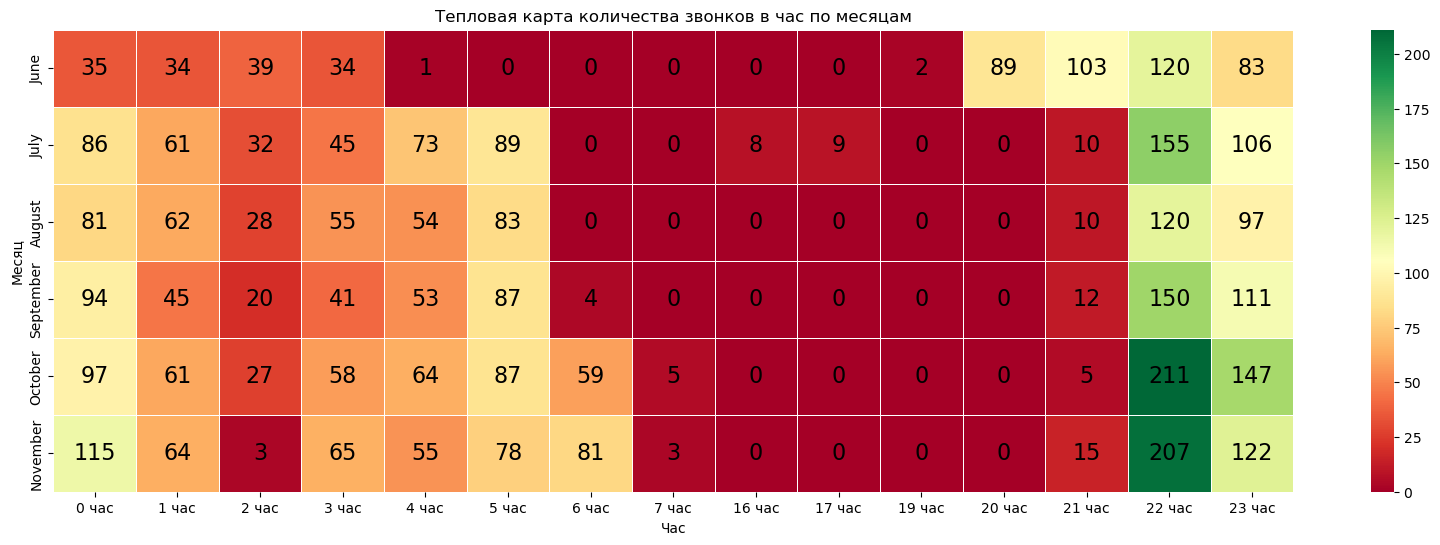

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Замените 'DataSet.xlsx' на путь к вашему файлу Excel
file_path = 'DataSet.xlsx'

# Используйте функцию read_excel для чтения данных из Excel файла
df = pd.read_excel(file_path)

# Извлекаем месяц и час из столбца "Дата"
df['Месяц'] = pd.to_datetime(df['Дата']).dt.month
df['Час'] = pd.to_datetime(df['Дата']).dt.hour

# Создаем сводную таблицу
pivot_table = df.pivot_table(values='Дата', index=df['Месяц'], columns=df['Час'], aggfunc='count', fill_value=0)

# Переименовываем колонки для удобства
pivot_table.columns = [f'{hour} час' for hour in pivot_table.columns]

# Переименовываем строки (месяцы) для удобства
month_names = df['Месяц'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B')).unique()
pivot_table.index = month_names

# Создаем тепловую карту без использования annot
plt.figure(figsize=(20, 6))
sns.heatmap(pivot_table, cmap="RdYlGn", linewidths=.5)

# Добавляем подписи в каждую ячейку
ax = plt.gca()
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        value = pivot_table.iloc[i, j]
        ax.text(j + 0.5, i + 0.5, str(value), ha='center', va='center', fontsize=16)

# Добавляем подписи к осям и заголовок
plt.xlabel('Час')
plt.ylabel('Месяц')
plt.title('Тепловая карта количества звонков в час по месяцам')

# Отображаем тепловую карту
plt.show()


In [33]:
import pandas as pd

# Замените 'DataSet.xlsx' на путь к вашему файлу Excel
file_path = 'DataSet.xlsx'

# Используйте функцию read_excel для чтения данных из Excel файла
df = pd.read_excel(file_path)

# Преобразование столбца "Дата" к типу datetime
df['Дата'] = pd.to_datetime(df['Дата'])

# Создание новых столбцов "Час" и "Длительность звонка в секундах"
df['Час'] = df['Дата'].dt.hour
df['Длительность звонка в секундах'] = pd.to_timedelta(df['Длительность'], unit='s')

# Группировка данных по часам и суммирование длительности звонков
pivot_table = df.groupby('Час')['Длительность звонка в секундах'].sum().reset_index()

# Преобразование суммы длительности звонков обратно в формат час:мин:сек
pivot_table['Длительность звонка'] = pivot_table['Длительность звонка в секундах'].apply(lambda x: f"{int(x.total_seconds() // 3600)}:{int((x.total_seconds() % 3600) // 60):02d}:{int(x.total_seconds() % 60):02d}")

# Вывод сводной таблицы
pivot_table[['Час', 'Длительность звонка']].head(24)

,Час,Длительность звонка
0,0,52:03:48
1,1,34:10:48
2,2,17:03:57
3,3,30:35:12
4,4,31:05:44
5,5,40:11:32
6,6,11:49:27
7,7,0:00:00
8,16,0:49:05
9,17,0:54:40


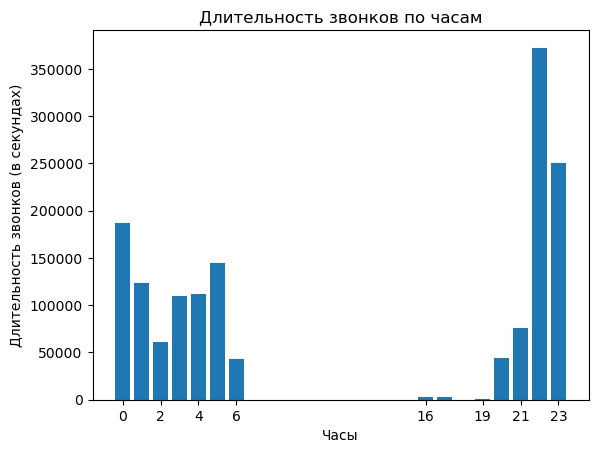

In [42]:
import matplotlib.pyplot as plt

# Создание столбчатой диаграммы
plt.bar(pivot_table['Час'], pivot_table['Длительность звонка в секундах'].dt.total_seconds())

# Настройка осей и заголовка
plt.xlabel('Часы')
plt.ylabel('Длительность звонков (в секундах)')
plt.title('Длительность звонков по часам')

# Установка только четных значений на оси X
plt.xticks(pivot_table['Час'][::2])


# Отображение графика
plt.show()
